In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf

In [6]:
(x_train,y_train) , (x_test,y_test) = keras.datasets.mnist.load_data()

In [8]:
# Normalizing the data

img_rows, img_cols = 28, 28

if keras.backend.image_data_format() == 'channels_first':
   x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
   x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
   inpx = (1, img_rows, img_cols)

else:
   x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
   x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
   inpx = (img_rows, img_cols, 1)

   
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /=255
x_test /=255


In [119]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
model = keras.Sequential([
            # FEATURE EXTRACTION
                        keras.layers.Input(shape=inpx),
                        keras.layers.Conv2D(32, kernel_size=(b
                             3, 3), activation='relu'),
                        keras.layers.Conv2D(64, (3, 3), activation='relu'),
                        keras.layers.MaxPooling2D(pool_size=(3, 3)),  #Pooling
                        keras.layers.Dropout(0.5),      #Regularization
            
            # TRAINING ANN
                        keras.layers.Flatten(),
                        keras.layers.Dense(300, activation='sigmoid'),
                        keras.layers.Dense(10, activation='softmax')])

model.compile(optimizer="adam",
                    loss=keras.losses.categorical_crossentropy,
                    metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10,batch_size=512)

Epoch 1/10
118/118 [==============================] - 125s 1s/step - loss: 0.4985 - accuracy: 0.8563
Epoch 2/10
118/118 [==============================] - 124s 1s/step - loss: 0.1249 - accuracy: 0.9652
Epoch 3/10
118/118 [==============================] - 124s 1s/step - loss: 0.0790 - accuracy: 0.9774
Epoch 4/10
118/118 [==============================] - 123s 1s/step - loss: 0.0609 - accuracy: 0.9829
Epoch 5/10
118/118 [==============================] - 123s 1s/step - loss: 0.0499 - accuracy: 0.9857
Epoch 6/10
118/118 [==============================] - 123s 1s/step - loss: 0.0425 - accuracy: 0.9878
Epoch 7/10
118/118 [==============================] - 123s 1s/step - loss: 0.0372 - accuracy: 0.9892
Epoch 8/10
118/118 [==============================] - 124s 1s/step - loss: 0.0334 - accuracy: 0.9904
Epoch 9/10
118/118 [==============================] - 124s 1s/step - loss: 0.0291 - accuracy: 0.9918
Epoch 10/10
118/118 [==============================] - 123s 1s/step - loss: 0.0260 - accura

In [12]:
score = model.evaluate(x_test, y_test, verbose=0)
print('loss=', score[0])
print('accuracy=', score[1])


loss= 0.02559620328247547
accuracy= 0.9922000169754028


In [26]:
# Visulizng the representation by the CNN
layer_outputs = [layer.output for layer in model.layers[1:-1]]
activation_model = keras.Model(inputs=model.input,outputs=layer_outputs)




(-0.5, 27.5, 27.5, -0.5)

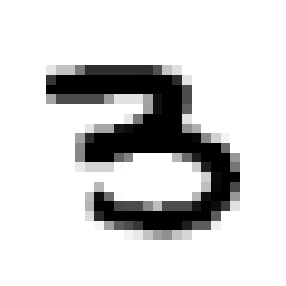

In [23]:
# Choosing a random image from data set
img = x_test[51].reshape(1,28,28,1)
fig = plt.figure(figsize=(5,5))
plt.imshow(img[0,:,:,0],cmap=plt.cm.binary)
plt.axis('off')

In [24]:
activations = activation_model.predict(img)

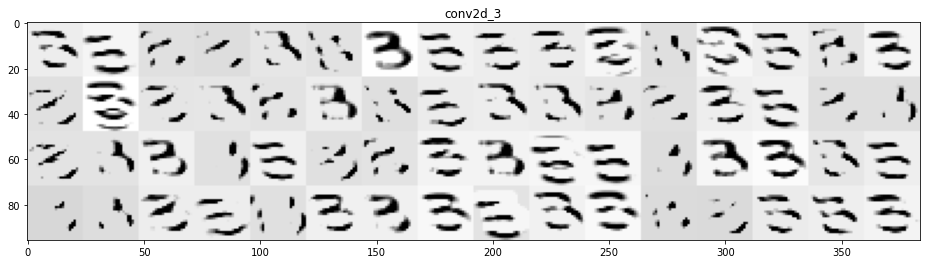

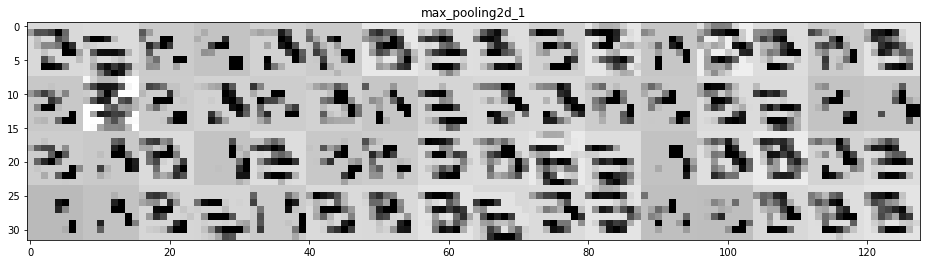

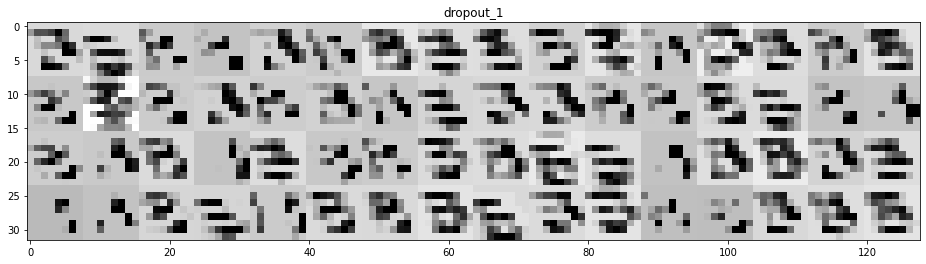

In [30]:
layer_names = []
for layer in model.layers[1:-1]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row 
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): id
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() 
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto',cmap=plt.cm.binary)

In [31]:
# Using Auto-encoders for the feature extraction

In [62]:
(x_train,y_train) , (x_test,y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /=255
x_test /=255

x_train= x_train.reshape(-1,784)
x_test = x_test.reshape(-1,784)


In [134]:
# We will bring a non-linear transformation to 25 dimesnion space

encoding_dim = 25
input_img = keras.layers.Input(shape=(784,))
# encoded representation of input
encoded = keras.layers.Dense(encoding_dim, activation='relu')(input_img)
# decoded representation of code 
decoded = keras.layers.Dense(784, activation='sigmoid')(encoded)
# Model which take input image and shows decoded images
autoencoder = keras.Model(input_img, decoded) 


encoder = keras.Model(input_img,encoded)
# Creating a decoder model
encoded_input = keras.layers.Input(shape=(encoding_dim,))
# last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input)) 


In [136]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                 epochs=15,
                 batch_size=128,
                 validation_data=(x_test, x_test))

Epoch 1/15
469/469 [==============================] - 4s 8ms/step - loss: 0.1446 - val_loss: 0.1273
Epoch 2/15
469/469 [==============================] - 4s 8ms/step - loss: 0.1219 - val_loss: 0.1155
Epoch 3/15
469/469 [==============================] - 4s 8ms/step - loss: 0.1141 - val_loss: 0.1101
Epoch 4/15
469/469 [==============================] - 4s 7ms/step - loss: 0.1097 - val_loss: 0.1067
Epoch 5/15
469/469 [==============================] - 3s 7ms/step - loss: 0.1072 - val_loss: 0.1050
Epoch 6/15
469/469 [==============================] - 3s 7ms/step - loss: 0.1060 - val_loss: 0.1040
Epoch 7/15
469/469 [==============================] - 3s 7ms/step - loss: 0.1053 - val_loss: 0.1035
Epoch 8/15
469/469 [==============================] - 3s 7ms/step - loss: 0.1050 - val_loss: 0.1033
Epoch 9/15
469/469 [==============================] - 3s 7ms/step - loss: 0.1047 - val_loss: 0.1032
Epoch 10/15
469/469 [==============================] - 3s 7ms/step - loss: 0.1046 - val_loss: 0.1030

In [137]:
 encoded_img = encoder.predict(x_test)
 decoded_img = decoder.predict(encoded_img)

Text(0.5, 1.0, 'Original data')

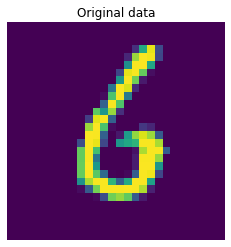

In [104]:
plt.imshow(x_test[50].reshape(28,28))
plt.axis('off')
plt.title("Original data")

Text(0.5, 1.0, 'Decoded back from 25 neurons')

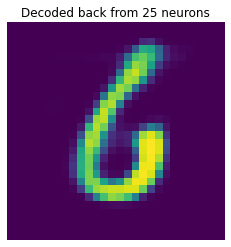

In [138]:
plt.imshow(decoded_img[50].reshape(28,28))
plt.axis('off')
plt.title("Decoded back from 25 neurons")

In [139]:
encoded_train_image= encoder.predict(x_train)
encoded_test_image= encoder.predict(x_test)


In [144]:
model = keras.Sequential([keras.layers.Input(shape=(25,)),
                          keras.layers.Dense(25,activation='relu'),
                          keras.layers.Dense(25,activation='relu'),
                          keras.layers.Dense(10,activation='softmax'),
                          ])

model.compile(optimizer='adam',loss= keras.losses.binary_crossentropy,metrics=['accuracy'])

model.fit(encoded_train_image,y_train,epochs=15,validation_data=(encoded_test_image,y_test))

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1573 - accuracy: 0.7214 - val_loss: 0.0724 - val_accuracy: 0.8917
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0655 - accuracy: 0.8978 - val_loss: 0.0562 - val_accuracy: 0.9116
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0543 - accuracy: 0.9160 - val_loss: 0.0490 - val_accuracy: 0.9234
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0485 - accuracy: 0.9253 - val_loss: 0.0468 - val_accuracy: 0.9299
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0449 - accuracy: 0.9311 - val_loss: 0.0426 - val_accuracy: 0.9345
Epoch 6/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0420 - accuracy: 0.9363 - val_loss: 0.0396 - val_accuracy: 0.9403
Epoch 7/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0401 - accuracy: 0.9384 - val_loss: 0.0390 - val_accuracy: